<a href="https://colab.research.google.com/github/kterra/deep-learning-fgv/blob/main/aulas/aula_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# The classroom link
# https://classroom.google.com/c/MjIzMzAxOTkwMzEy?cjc=mv43l23
# classroom code: mv43l23



import torch 
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np 
import math 
batch_size = 64

device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
print(device)


train_set = torchvision.datasets.MNIST(root = '../../data', train= True, transform= transforms.ToTensor(), download= True)
test_set = torchvision.datasets.MNIST(root = '../../data', train= False, transform= transforms.ToTensor(), download= True)


train_loader = torch.utils.data.DataLoader(dataset=train_set, batch_size=batch_size, shuffle=True)
test_loader = torch.utils.data.DataLoader(dataset=test_set, batch_size=batch_size, shuffle=False)




cuda:0


Extracting ../../data/MNIST/raw/train-images-idx3-ubyte.gz to ../../data/MNIST/raw


Extracting ../../data/MNIST/raw/train-labels-idx1-ubyte.gz to ../../data/MNIST/raw



Extracting ../../data/MNIST/raw/t10k-images-idx3-ubyte.gz to ../../data/MNIST/raw


Extracting ../../data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ../../data/MNIST/raw
Processing...
Done!





/usr/local/lib/python3.6/dist-packages/torchvision/datasets/mnist.py:480: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  /pytorch/torch/csrc/utils/tensor_numpy.cpp:141.)
  return torch.from_numpy(parsed.astype(m[2], copy=False)).view(*s)


In [2]:
print(len(train_set))
print(len(test_set))

60000
10000


In [3]:
def Show_imgs(imgs, name,  size = 3, color = True):
  color_m ='jet'
  if color == False:
    color_m ='gray'
  print('******************' + name  +  '**************************')
  img_numbers = imgs.shape[0]
  rows = cols = math.ceil(np.sqrt(img_numbers))
  
  fig = plt.figure(figsize=(rows*size, cols*size))
  for i in range(0, rows*cols):
    fig.add_subplot(rows, cols,i+1)
    if i<img_numbers:
      plt.imshow(imgs[i].detach(), cmap = 'gray')
  plt.show()


torch.Size([1, 16, 15, 15])
torch.Size([1, 3600])


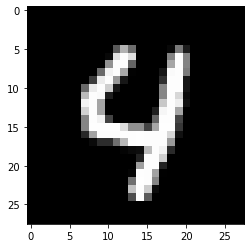

In [4]:
img, label = train_set[564]
plt.imshow(transforms.ToPILImage()(img), cmap = 'gray')
conv1 = nn.Conv2d(in_channels=1,out_channels=4, kernel_size=3, stride=1, padding=2)
img = img.unsqueeze(0)
# [batch_size, Channel, H,W]

out =  conv1(img)
act = nn.ReLU()(out)
pool1 = nn.MaxPool2d(2,2)(act)

layer1 = nn.Sequential( nn.Conv2d(1,16,3,1,2) , nn.ReLU(), nn.MaxPool2d(2,2))

out = layer1(img)
#Show_imgs(out[0], "layer 1")

print(out.shape)

out = out.reshape(out.size(0),-1)
print(out.shape)


#for i in range(4):
 #  Show_imgs(layer1[0].weight[i],"layer 1 weight", 1)



In [7]:
#hypengrparameter 
num_classes = 10
learning_rate =  0.001
num_epochs = 5

class CNN(nn.Module):
  def __init__(self, num_classes = 10):
    super(CNN,self).__init__()
    self.layer1 =  nn.Sequential( 
        nn.Conv2d(in_channels=1,out_channels=16, kernel_size=3, stride=1, padding=2),
        nn.ReLU(),
        nn.MaxPool2d(2,2))   
    
    self.layer2 =  nn.Sequential( 
        nn.Conv2d(in_channels=16,out_channels=32, kernel_size=5, stride=1, padding=2),
        nn.ReLU(),
        nn.MaxPool2d(2,2))   

    self.fc = nn.Linear(7*7*32,num_classes)

  def forward(self,x):
    out = self.layer1(x)
    out = self.layer2(out)
    out = out.reshape(out.size(0),-1)
    out = self.fc(out)
    return out
    
model = CNN(num_classes).to(device)
model.eval() 

loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr = learning_rate)




In [9]:
# training model
list_loss = []
list_time = []
total_step = 1000

j =0
for epoch in range(num_epochs):
   for i, (images, labels) in enumerate(train_loader):
     images = images.to(device)
     labels = labels.to(device)
     
     # forward 
     output = model(images)
     loss   = loss_fn(output, labels)

     # change the params
     optimizer.zero_grad()
     loss.backward()
     optimizer.step()

     list_loss.append(loss.item())
     list_time.append(j)
     j+=1
            
     if (i+1) % 100 == 0:
            print ('Epoch [{}/{}], Step [{}/{}], Loss: {:.4f}' 
                   .format(epoch+1, num_epochs, i+1, total_step, loss.item()))
            len
print("Finished Train")           


Epoch [1/5], Step [100/1000], Loss: 0.2212
Epoch [1/5], Step [200/1000], Loss: 0.1833
Epoch [1/5], Step [300/1000], Loss: 0.0297
Epoch [1/5], Step [400/1000], Loss: 0.0974
Epoch [1/5], Step [500/1000], Loss: 0.1627
Epoch [1/5], Step [600/1000], Loss: 0.0853
Epoch [1/5], Step [700/1000], Loss: 0.0765
Epoch [1/5], Step [800/1000], Loss: 0.1225
Epoch [1/5], Step [900/1000], Loss: 0.0669
Epoch [2/5], Step [100/1000], Loss: 0.1494
Epoch [2/5], Step [200/1000], Loss: 0.0212
Epoch [2/5], Step [300/1000], Loss: 0.0305
Epoch [2/5], Step [400/1000], Loss: 0.1227
Epoch [2/5], Step [500/1000], Loss: 0.0071
Epoch [2/5], Step [600/1000], Loss: 0.0056
Epoch [2/5], Step [700/1000], Loss: 0.0564
Epoch [2/5], Step [800/1000], Loss: 0.0307
Epoch [2/5], Step [900/1000], Loss: 0.0820
Epoch [3/5], Step [100/1000], Loss: 0.0199
Epoch [3/5], Step [200/1000], Loss: 0.0611
Epoch [3/5], Step [300/1000], Loss: 0.0222
Epoch [3/5], Step [400/1000], Loss: 0.0066
Epoch [3/5], Step [500/1000], Loss: 0.0686
Epoch [3/5]

In [10]:
len(list_loss)
x = [i for in range(len(list_loss))]
len(x), len(list_loss)
plt.plot(list_loss)

SyntaxError: ignored